<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

Welcome to the second Training Session (TS) of Dredging for Sustainable Infrastructure (CIEM3302). This training session will continue on the first training session and will focus on project realization.

## 0) Initialize notebook

In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.float_format = '{:,}'.format# show , for thousands
pd.set_option('display.max_columns', 1000)# show all columns

from pathlib import Path

# change the width of the cells on screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

## 1) Long-term Statistical Analysis

Statistics of workability are determined by water level, wave height, and (mean) wave period data from europlatform. In the cell below is the data loaded as a Panda Dataframe, make sure that it is in a subfolder called 'content' compared to this Jupiter Notebook. Then is the top of the table shown and are the time series for the wave period, wave heigth, and water level plotted.

,Hs [m],hour
time,,
2012-01-01 00:00:00,1.49262272910131,0
2012-01-01 01:00:00,1.5640411142480894,1
2012-01-01 02:00:00,1.609562005568361,2
2012-01-01 03:00:00,1.636151963909651,3
2012-01-01 04:00:00,1.6389448705755278,4


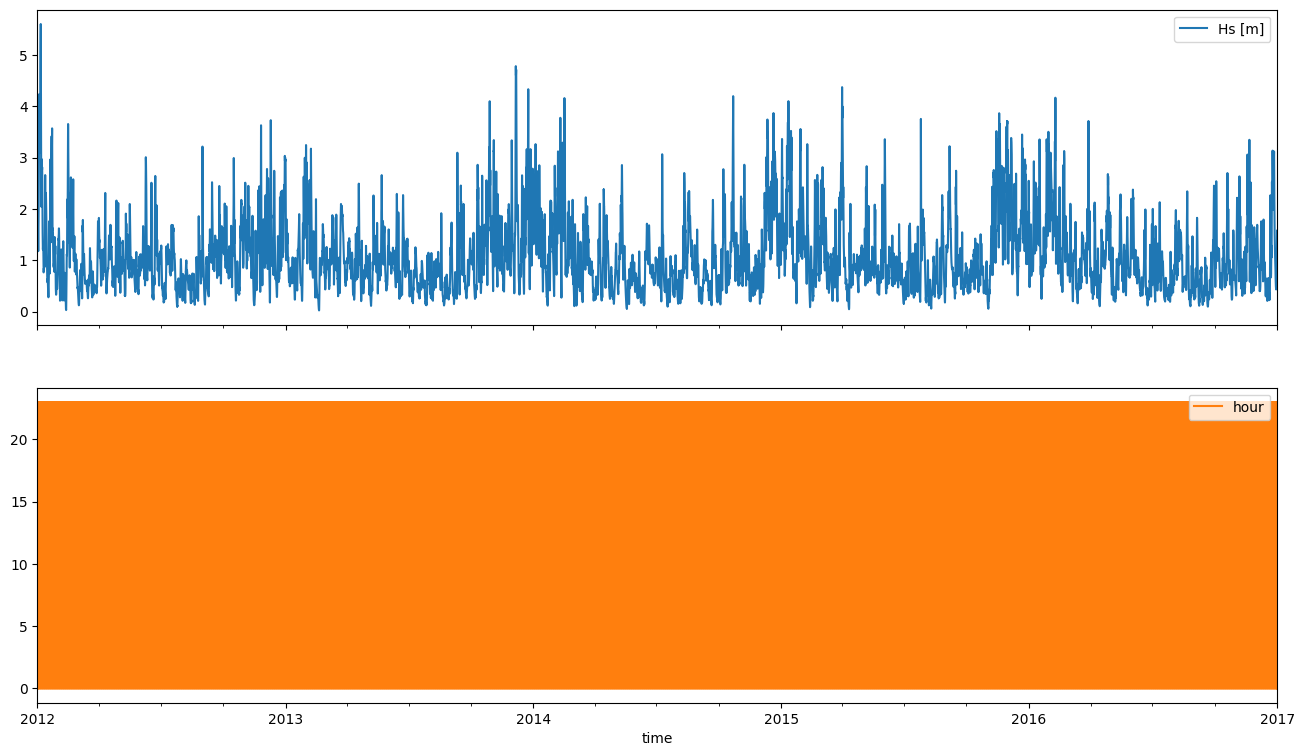

In [73]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

csv_file = Path(r"C:\Users\aryaa\Downloads\Waves_Safe_Haven (2).csv")
eurpfm = pd.read_csv(csv_file)
eurpfm['time'] = pd.to_datetime(eurpfm['time'], format='%Y-%m-%d %H:%M:%S')
eurpfm.set_index('time', inplace=True)
eurpfm['hour'] = eurpfm.index.hour
display(eurpfm.head(5))
eurpfm.plot(figsize=(16, 9), subplots=True)
plt.show()


### Analysisng Data through Histogram

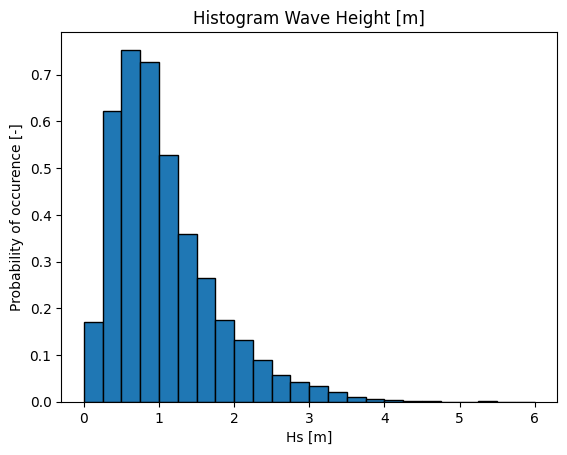

In [75]:
def plot_histogram(data, lowest, upper, res): # data, lower value, upper value,
    if np.min(data) < lowest:
        print('Not all data is included, reduce lower boundary')
    if np.max(data) > upper:
        print('Not all data is included, raise the upper boundary')
    Hist = np.histogram(data, bins=np.arange(lowest, upper + res, res), density = True)
    Bin_Boundaries = Hist[1][0:-1]+res/2
    plt.bar(Bin_Boundaries, Hist[0].tolist(), edgecolor = 'k', width = res);
    plt.ylabel('Probability of occurence [-]')

plt.figure()
plt.title('Histogram Wave Height [m]')
plot_histogram(data = eurpfm['Hs [m]'].values.tolist(), lowest = 0,upper = 6, res=0.25)
plt.xlabel('Hs [m]')

DF_conditions  = pd.DataFrame()
DF_conditions['hour'] = eurpfm['hour']  # Extracting the hour data from eurpfm
DF_conditions['Hs'] = eurpfm['Hs [m]']  # Extracting the Hs values

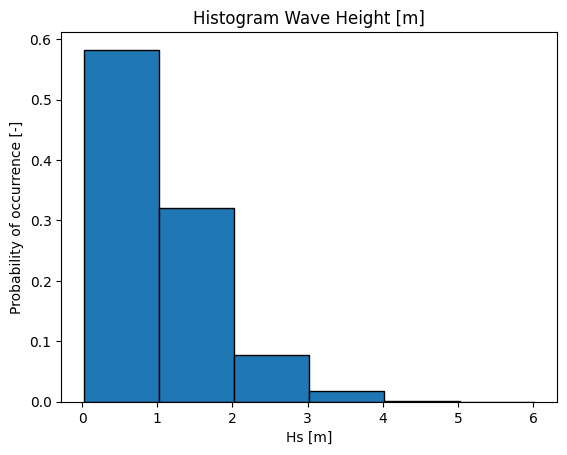

In [76]:
def plot_histogram(data, resolution, min_, max_):
    if np.min(data) < min_:
        print('Not all data is included, reduce lower boundary')

    if np.max(data) > max_:
        print('Not all data is included, raise the upper boundary')

    Hist = np.histogram(data, bins=np.arange(min_, max_ + resolution, resolution), density=True)
    Bin_Boundaries = np.arange(min_ + resolution / 2, max_ + resolution / 2, resolution)

    plt.bar(Bin_Boundaries, Hist[0].tolist(), edgecolor='k', width=resolution)
    plt.ylabel('Probability of occurrence [-]')

plt.figure()
plt.title('Histogram Wave Height [m]')
plot_histogram(data=eurpfm['Hs [m]'].values, resolution=1, min_=eurpfm['Hs [m]'].min(), max_=eurpfm['Hs [m]'].max())
plt.xlabel('Hs [m]')
plt.show()


#### Workability

In [ ]:
Hs_threshold = 0.25 * 6.2

good_conditions = DF_conditions.copy()
good_conditions = good_conditions[good_conditions.Hs <= Hs_threshold]

work_percentage = len(good_conditions)/len(DF_conditions)*100
print('The workability:', work_percentage, '%')

### 1.3) Montly mean and Standard Deviation

For all the three parameters described in the eurpfm, calculate for each month the mean and the standard devation as if they are normally distributed. And show each parameter on a seperate graph, with on the x-axis the period from januari to december.

Hint: monthly data can be achieved by applying the code below. 

In [77]:
mean_overal = eurpfm.mean()
print('Mean')
print(mean_overal, "\n")

print('Standard deviation')
std_overal = eurpfm.std()
print(std_overal)

Mean
Hs [m]    1.061542415648853
hour     11.499737736322379
dtype: float64 

Standard deviation
Hs [m]   0.6874802644205983
hour     6.9224044015760375
dtype: float64


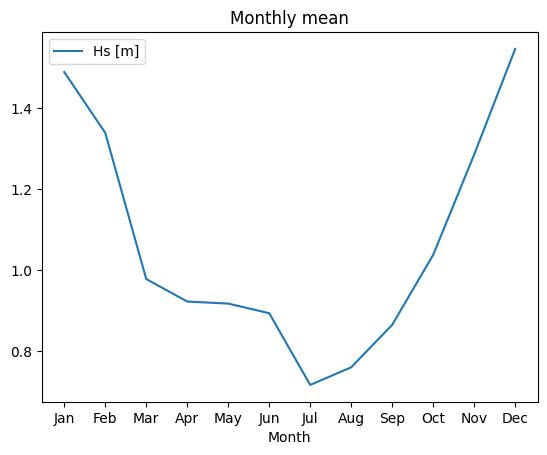

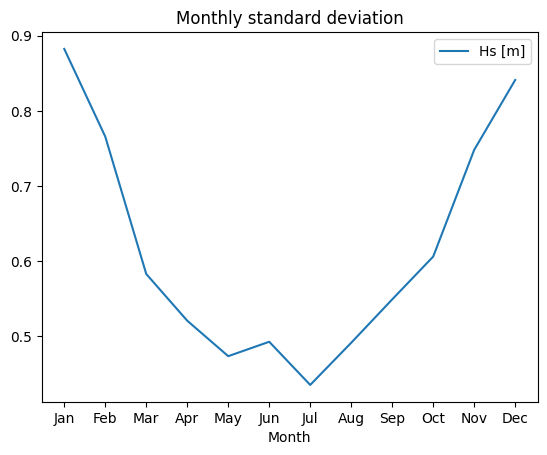

In [78]:
Hs_mean =[]

Hs_std =[]

for month in range(1,12+1,1):
    monthly_data_mean = eurpfm[eurpfm.index.month == month].mean().values.tolist()
    Hs_mean.append(monthly_data_mean[0])
    
    monthly_data_std = eurpfm[eurpfm.index.month == month].std().values.tolist()
    Hs_std.append(monthly_data_std[0])

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
plt.figure()
plt.title('Monthly mean')
plt.plot(Hs_mean, label = 'Hs [m]')
plt.legend(loc = 'best')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')

plt.figure()
plt.title('Monthly standard deviation')
plt.plot(Hs_std, label = 'Hs [m]')
plt.legend(loc = 'best')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month');

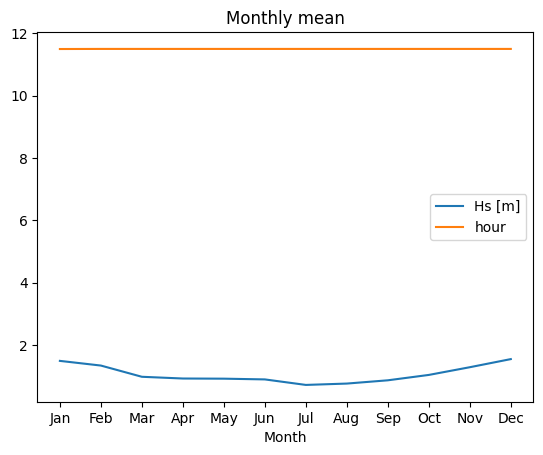

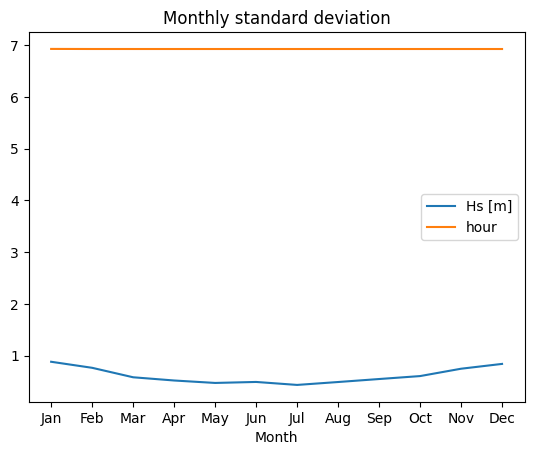

In [79]:
# and the short version
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_mean = eurpfm.groupby([eurpfm.index.month]).mean()
plt.plot(monthly_mean)
plt.title('Monthly mean')
plt.legend(labels = eurpfm.columns.tolist())
plt.xticks(np.linspace(1,12,12), months);
plt.xlabel('Month')

plt.figure()
monthly_mean = eurpfm.groupby([eurpfm.index.month]).std()
plt.plot(monthly_mean)
plt.title('Monthly standard deviation')
plt.legend(labels = eurpfm.columns.tolist());
plt.xticks(np.linspace(1,12,12), months);
plt.xlabel('Month');

## 2) Long-term assessment

### 2.1) workability

To perform the acitivities the wave height should be lower than 1.5 m, based on the mean and standard deviation, which months are most suitable and which not? 

What is the workability for each month, in which the wave height is at most 1.5 meter and the minum required water level is -0.5 m CD. Can you plot this?

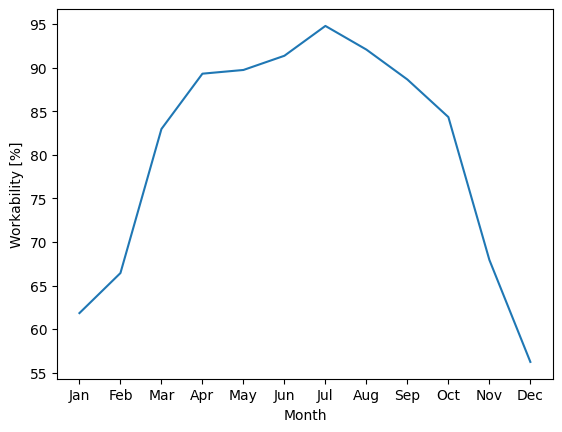

In [80]:
Hs_thres = 0.25*6.20
work_ability = []

for month in range(1,12+1,1):
    data_month = eurpfm[eurpfm.index.month == month].copy()
    n_all = len(data_month)
    
    data_month = data_month[data_month['Hs [m]'] <= Hs_thres]
    n_workable = len(data_month)
    
    work_ability.append(n_workable/n_all*100)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(work_ability);
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Workability [%]');

Based on the calculated workability, which months are most suitable?

If you consider the average temperature, shown at the start of section 1.1, which month do you recommend to do the activities?

What is the down time each month, without considering that the required conditions need to apply for several consecutive hours?

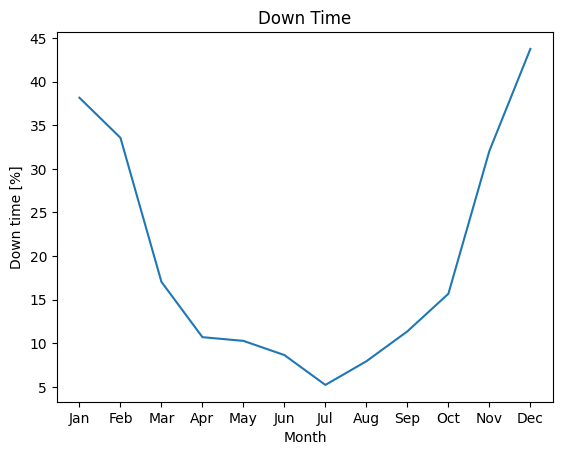

In [81]:
down_time = 100 - np.array(work_ability)

plt.plot(down_time)
plt.title('Down Time')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Down time [%]');

### 2.2) Persistency

Calculate the workability per month if a minimum of 6 consecutive hours with suitable conditions are required to perform a single operation. Suitable conditions have a maximum of 1.5 m significant wave height and a water level above or equal to -0.5 m CD. The workability can be contributed to the starting month if the conditions are suitable at the transition of the month. A setup for an possible approach is given in the cell below.

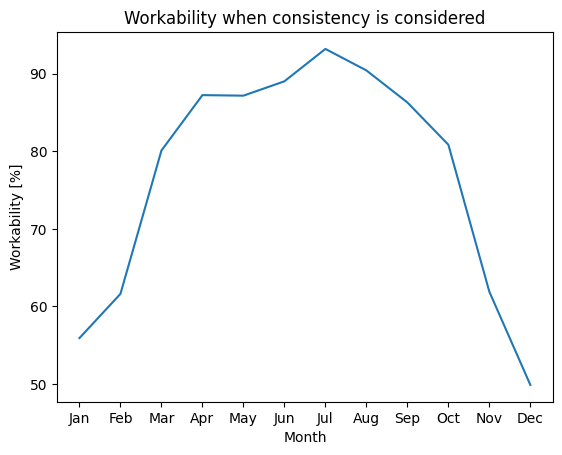

In [82]:
# Start of the answer, dont delete cell above.
Hs_thres = 0.25*6.20

month_assessed = np.zeros(12)# an array that counts how many times each month is reviewed.
month_succes = np.zeros(12)# an array that will count the number of time 6 consequetive hours are occuring


for i in range(len(eurpfm)):
    period = eurpfm.iloc[i:i+6]
    
    month = period.index[0].month
    month_assessed[month-1] += 1# to zero-based
    
    Hs_serie = period['Hs [m]'].values.tolist()
    
    if np.max(Hs_serie) < Hs_thres:
        month_succes[month-1] += 1# to zero-based
    #else:
    #    print(i, 'not succes, Hs', np.max(Hs_serie), 'Wl min', np.min(WL_serie))

workability = month_succes/month_assessed*100

plt.plot(workability)
plt.title('Workability when consistency is considered')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Workability [%]');

In [83]:
#dreging volumes for channel
def V_trench(B,H,phi,L):#phi in degrees, B = bottom width, H = layer thickness
    phi_rad = phi*np.pi/180
    A = H*(B+H/np.tan(phi_rad))*L
    B1 = B + 2*H/np.tan(phi_rad)
    return A,B1

# cemented sand (bottom)
V_cemented, B_top_cemented = V_trench(B = 50,H = 2,phi = 35, L=1000) 
      
# sand layer (middle)
V_sand, B_top_sand = V_trench(B = B_top_cemented,H = 2,phi = 35, L=1000) 
print('Sand:', round(V_sand,0) ,'m3, top widht:', round(B_top_sand,0), 'm')


Sand: 117138.0 m3, top widht: 61.0 m


In [84]:
print(eurpfm.columns)  
print(eurpfm.head())   

DF_conditions = pd.DataFrame()
DF_conditions['hour'] = eurpfm['hour']  
DF_conditions['Hs'] = eurpfm['Hs [m]']  #
# Step 1: Sand Supply Calculation
def sand_supply_per_meter(depth):
    return 250 + 260 * (depth ** 1.4)

def total_sand_supply(depth, length=1000, width=220, density=2000):
    sand_supply_kg_per_meter = sand_supply_per_meter(depth)
    total_sand_kg = sand_supply_kg_per_meter * length * width
    total_sand_m3 = total_sand_kg / density  
    return total_sand_m3


depth_8m = 8
depth_13m = 13
total_sand_8m = total_sand_supply(depth_8m)
total_sand_13m = total_sand_supply(depth_13m)

print(f"Total sand supply for 8 m depth: {total_sand_8m:.2f} m³/week")
print(f"Total sand supply for 13 m depth: {total_sand_13m:.2f} m³/week")

# Step 2: Workability Calculation
def calculate_monthly_workability(DF_conditions, Hs_threshold=6.20*0.25):
    DF_conditions['month'] = DF_conditions.index.month
    workability_by_month = {}
    
    for month in range(1, 13):
        monthly_data = DF_conditions[DF_conditions['month'] == month]
        good_conditions = monthly_data[monthly_data['Hs'] <= Hs_threshold]
        workability_percentage = len(good_conditions) / len(monthly_data) * 100
        workability_by_month[month] = workability_percentage
    
    return workability_by_month

def calculate_cycle_time(loading_time, sailing_time, dumping_time):
    return loading_time + sailing_time + dumping_time + sailing_time

def calculate_persistency(DF_conditions, Hs_threshold, cycle_time):
    favorable_conditions = DF_conditions['Hs'] <= Hs_threshold
    persistency_hours = 0
    total_persistency_cycles = 0
    
    for i in range(len(favorable_conditions) - int(cycle_time)):
        if np.all(favorable_conditions[i:i + int(cycle_time)]):
            total_persistency_cycles += 1
            persistency_hours += cycle_time
    
    persistency_percentage = (persistency_hours / len(DF_conditions)) * 100
    return total_persistency_cycles, persistency_percentage

def calculate_weekly_production_with_persistency(hopper_capacity, total_cycles):
    return hopper_capacity * total_cycles

def calculate_mobilization_time(distance, sailing_speed):
    return distance / sailing_speed


hopper_capacity = 4000  # m³
dredging_rate = 1000  # m³/hour
sailing_distance = 11  # km to the dumping site
sailing_speed = 22.22  # km/h
dumping_time = 0.5  # hours
Hs_threshold = 0.25*6.20  # Maximum wave height in meters

loading_time = hopper_capacity / dredging_rate  # in hours
sailing_time_to_dumping = sailing_distance / sailing_speed  # in hours
cycle_time = calculate_cycle_time(loading_time, sailing_time_to_dumping, dumping_time)

# Calculate workability and persistency
monthly_workability = calculate_monthly_workability(DF_conditions)
total_cycles, persistency_percentage = calculate_persistency(DF_conditions, Hs_threshold, cycle_time)

# Calculate weekly production based on persistency
weekly_production = calculate_weekly_production_with_persistency(hopper_capacity, total_cycles)

# Calculate mobilization and return time
distance_to_equipment_site = 75  # km
mobilization_time = calculate_mobilization_time(distance_to_equipment_site, sailing_speed)
return_time = mobilization_time  # same for return
total_mobilization_time = mobilization_time + return_time

print(f"Persistency percentage: {persistency_percentage:.2f}%")
print(f"Weekly production considering persistency: {weekly_production:.2f} m³/week")
print(f"Mobilization time: {mobilization_time:.2f} hours")
print(f"Return time: {return_time:.2f} hours")
print(f"Total time for mobilization and return: {total_mobilization_time:.2f} hours")


Index(['Hs [m]', 'hour'], dtype='object')
                                Hs [m]  hour
time                                        
2012-01-01 00:00:00   1.49262272910131     0
2012-01-01 01:00:00 1.5640411142480894     1
2012-01-01 02:00:00  1.609562005568361     2
2012-01-01 03:00:00  1.636151963909651     3
2012-01-01 04:00:00 1.6389448705755278     4
Total sand supply for 8 m depth: 553144.37 m³/week
Total sand supply for 13 m depth: 1064757.84 m³/week
Persistency percentage: 426.52%
Weekly production considering persistency: 136264000.00 m³/week
Mobilization time: 3.38 hours
Return time: 3.38 hours
Total time for mobilization and return: 6.75 hours
